# Moving Average

In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_excel('JKH.xlsx', 'Sheet1')

#print the head
df.head()

,COMPANY_ID,Date,OPEN_PRICE,PRICE_HI,PRICE_LO,CLOSE_PRICE,TRADE_VOLUME,SHARE_VOLUME,TURNOVER
0,JKH,2016-01-04,179.0,179.0,177.0,177.2,59,285322,50709765.8
1,JKH,2016-01-05,177.4,177.5,176.5,176.8,54,10581,1870881.4
2,JKH,2016-01-06,177.0,177.5,176.0,176.1,94,133449,23556098.7
3,JKH,2016-01-07,176.0,176.0,171.0,173.0,171,949036,162677780.9
4,JKH,2016-01-08,173.0,173.1,172.0,172.2,83,20249,3491700.2


C:\Users\212607214\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


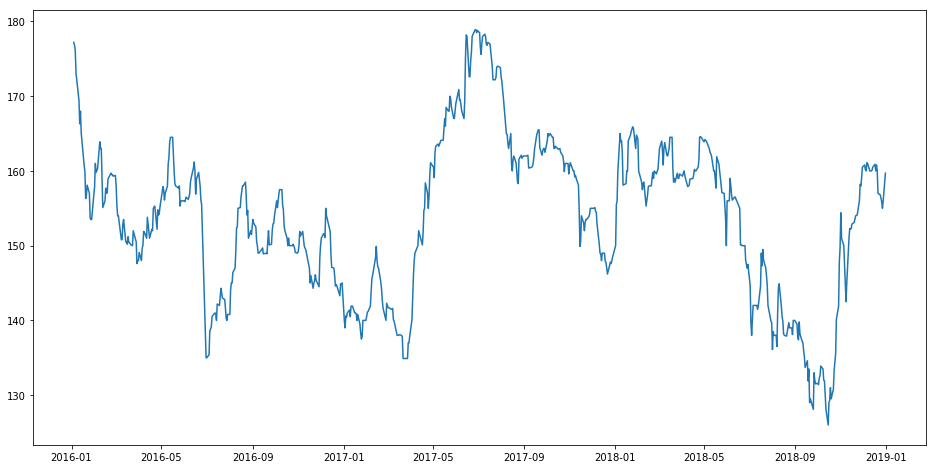

In [2]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['CLOSE_PRICE'], label='Close Price history')

In [3]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'CLOSE_PRICE'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['CLOSE_PRICE'][i] = data['CLOSE_PRICE'][i]

In [4]:
#splitting into train and validation
train = new_data[:700]
valid = new_data[700:]

In [5]:
new_data.shape, train.shape, valid.shape

((718, 2), (700, 2), (18, 2))

In [6]:
train['Date'].min(), train['Date'].max(), valid['Date'].min(), valid['Date'].max()

(Timestamp('2016-01-04 00:00:00'),
 Timestamp('2018-12-04 00:00:00'),
 Timestamp('2018-12-05 00:00:00'),
 Timestamp('2018-12-31 00:00:00'))

In [7]:
#make predictions
preds = []
for i in range(0,18):
    a = train['CLOSE_PRICE'][len(train)-18+i:].sum() + sum(preds)
    b = a/18
    preds.append(b)

In [8]:
#calculate rmse
rms=np.sqrt(np.mean(np.power((np.array(valid['CLOSE_PRICE'])-preds),2)))
rms

4.00123122571966

C:\Users\212607214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\212607214\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


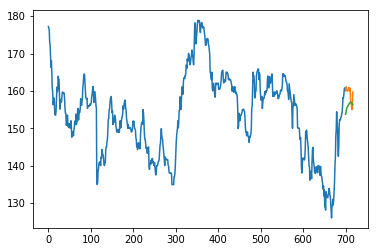

In [9]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['CLOSE_PRICE'])
plt.plot(valid[['CLOSE_PRICE', 'Predictions']])